In [1]:
import pandas as pd
import numpy as np
import pymorphy2
import re
import os
import json
import matplotlib.pyplot as plt

In [2]:
f_dir = os.listdir("results")
news_from_json = []
for i in f_dir:
    with open("results/" + i, "r", encoding="utf-8") as f:
        text = json.load(f)
        news_from_json.append([text['hedaer'], text['text']])
news = pd.DataFrame(data = news_from_json, columns = ['Header', 'News'])
news.head()

Header  \
0  После вмешательства прокуратуры в Крестецком р...   
1  Новгородцев приглашают принять участие в фести...   
2  В Окуловском районе пассажирка ВАЗа погибла в ДТП   
3  Небольшой дождь ожидается в Новгородской облас...   
4  Проекты Сбера победили в национальной премии «...   

                                                News  
0  Новгородская межрайонная природоохранная проку...  
1  «Золотая пуговица» — это фестиваль для детей и...  
2  Сегодня, 13 января, в Окуловском районе на 250...  
3  Послезавтра, 19 марта, жителей Новгородской об...  
4  Сбер стал победителем национальной премии «Соб...

In [3]:
news.shape

(1295, 2)

In [21]:
news_from_json

[['После вмешательства прокуратуры в Крестецком районе организовали контейнерные площадки',
  'Новгородская межрайонная природоохранная прокуратура провела проверку соблюдения требований законодательства в области обращения с отходами.Выяснилось, что в деревнях Лякова, Жары и Подсека Крестецкого района нет контейнерных площадок для накопления мусора. При этом администрация Ручьевского сельского поселения не принимала мер для их обустройства.Прокурор направил в суд административное исковое заявление об обязании администрации сельского поселения устранить выявленные нарушения. Суд удовлетворил требования прокуратуры в полном объёме. Сейчас нарушения устранены.'],
 ['Новгородцев приглашают принять участие в фестивале карнавального костюма «Золотая пуговица»',
  '«Золотая пуговица» — это фестиваль для детей и их родителей, которые делают карнавальные костюмы своими руками. В этом году фестиваль станет юбилейным. Он пройдёт в двадцать пятый раз.Сейчас открыт приём заявок на фестиваль. Он пр

In [4]:
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

In [5]:
model_w2v = KeyedVectors.load_word2vec_format('araneum_upos_skipgram_300_2_2018.vec.gz')

In [12]:

POS = {'ADJF':'ADJ', 'ADJS':'ADJ', 'ADV':'ADV', 'NOUN':'NOUN', 
            'VERB':'VERB', 'PRTF':'ADJ', 'PRTS':'ADJ', 'GRND':'VERB'}

cashed_words = {}
nones = {} 

morph = pymorphy2.MorphAnalyzer()

def normalizeTextByPOS(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        if t in cashed_words.keys():
            words.append(cashed_words[t])
        elif t in nones.keys():
            pass
        else:
            pv = morph.parse(t)
            if pv[0].tag.POS != None:
                if pv[0].tag.POS in POS.keys():
                    word = pv[0].normal_form + "_" + POS[pv[0].tag.POS]
                    words.append(word)
                    cashed_words[t] = word
                else:
                    nones[t] = ""
                    
    return words

In [13]:
index2word_set = set(model_w2v.index_to_key)

def vectorize(text):
    vector = np.zeros((model_w2v.vector_size,), dtype="float32")
    n_words = 0

    for word in normalizeTextByPOS(text):
        if word in index2word_set:
            n_words = n_words + 1
            vector = np.add(vector, model_w2v[word]) 
    
    if n_words != 0:
        vector /= n_words
    return vector

In [14]:
w2v_vectors = [vectorize(text) for text in news.News]

In [15]:
w2v_vectors

[array([-1.99924503e-02,  4.30960022e-02,  1.10454019e-02, -6.02467265e-03,
         9.80434939e-03, -2.13431995e-02,  1.00425240e-02,  2.69379979e-03,
         5.08687552e-03, -1.94999464e-02, -5.41372970e-02,  2.02428475e-02,
         1.99010503e-02,  5.76591715e-02, -1.04916720e-02,  8.59347545e-03,
         5.59264012e-02,  1.53578240e-02, -3.03958748e-02, -1.31485509e-02,
         1.34139962e-03, -8.95275152e-04,  1.78247746e-02, -6.97954884e-03,
        -3.29428278e-02,  2.23511271e-02,  4.22402248e-02, -2.52712257e-02,
         3.30372266e-02, -2.47920752e-02, -4.93840035e-03,  1.48860514e-02,
         3.39577459e-02, -3.87439504e-02,  1.60017551e-03,  1.40883997e-02,
        -3.33711468e-02, -1.58450007e-03, -1.84523501e-02, -8.61340296e-03,
         2.71706041e-02, -2.32930742e-02,  1.84569471e-02, -1.26582535e-03,
        -4.59714979e-03,  2.46451981e-02, -1.93073004e-02, -1.04912762e-02,
        -1.43068256e-02,  5.22069111e-02,  1.40955988e-02, -2.28803772e-02,
         4.2

In [16]:
from umap.umap_ import UMAP

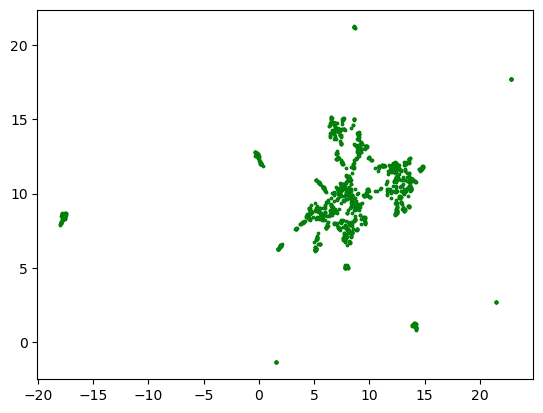

In [17]:
from umap.umap_ import UMAP
umap_news = UMAP()
umaped_vct = umap_news.fit_transform(w2v_vectors)
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='g', s=3)
plt.show()

In [18]:
#import seaborn as sns
from matplotlib.colors import ListedColormap
#from numpy.random import choice
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans

In [19]:
crit = []

max_num = 12
for k in range(2, max_num):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(umaped_vct)
    crit.append(np.sqrt(kmeans.inertia_))

def elbow_demo(k=2):
    
    kmeans = KMeans(n_clusters=k, random_state=1).fit(umaped_vct)
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].scatter(umaped_vct[:, 0], umaped_vct[:, 1], c=kmeans.labels_)
    #y = kmeans.labels_
    
    ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  marker='o', c="white", alpha=1, s=200)
    
    ax[0].set_xlabel('$x_1$')
    ax[0].set_ylabel('$x_2$')

    for i, c in enumerate(kmeans.cluster_centers_):
        ax[0].scatter(c[0], c[1], marker=f'${i}$', alpha=1, s=50)
        
    ax[1].scatter(k, crit[k-2], color='g', marker='s', s=90)
    ax[1].plot(range(2,max_num), crit, marker='s')
    
    ax[1].set_xlabel('$k$')
    ax[1].set_ylabel('$L^{(k)}(C)$')
    
    plt.show()
    


In [20]:
from ipywidgets import interact, IntSlider, fixed, FloatSlider
interact(elbow_demo, k=IntSlider(min=2,max=10,step=1,value=2));

interactive(children=(IntSlider(value=2, description='k', max=10, min=2), Output()), _dom_classes=('widget-int…

In [17]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(kmeans.labels_, news.News)

0.003027095873215535

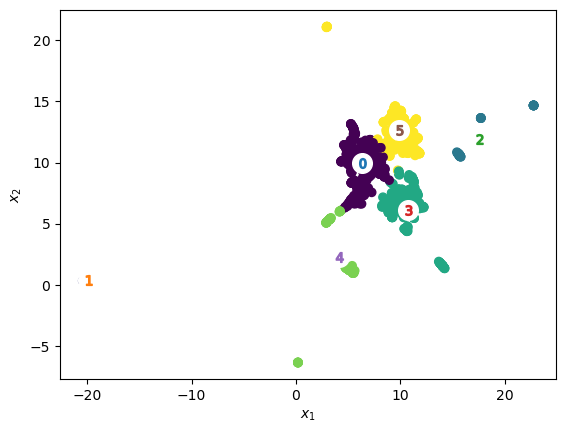

In [18]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=1).fit(umaped_vct)
crit.append(np.sqrt(kmeans.inertia_))
y = kmeans.labels_

fig, ax = plt.subplots(1,1)

ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], c=kmeans.labels_)
#y = kmeans.labels_

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              marker='o', c="white", alpha=1, s=200)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
for i, c in enumerate(kmeans.cluster_centers_):
    ax.scatter(c[0], c[1], marker=f'${i}$', alpha=1, s=50)

plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(umaped_vct, y, test_size=0.4)

In [25]:
knn = KNeighborsClassifier(n_neighbors=6, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [27]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


y_hat2=knn.predict(X_test)

In [28]:
def calc_prec(y_hat2, y_test):
    prec=0
    for i, j in zip(y_hat2, y_test):
        if i==j:
            prec+=1
    prec/=len(y_test)
    return prec

calc_prec(y_hat2, y_test)

0.9961389961389961